In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [3]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [4]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# Define the Residual Block
def residual_block(inputs, filters, strides=1):
    shortcut = inputs
    
    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    
    # If downsampling is needed, apply convolution to shortcut
    if strides != 1:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)
        shortcut = BatchNormalization()(shortcut)
    
    # Add shortcut to the main path and apply activation
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    
    return x

In [6]:
# Define the ResNet model
def resnet():
    inputs = tf.keras.Input(shape=(32, 32, 3))
    
    # Initial convolutional layer
    x = Conv2D(64, kernel_size=(7, 7), strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Max pooling layer
    x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)
    
    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    
    x = residual_block(x, filters=128, strides=2)
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=128)
    
    x = residual_block(x, filters=256, strides=2)
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=256)
    
    x = residual_block(x, filters=512, strides=2)
    x = residual_block(x, filters=512)
    x = residual_block(x, filters=512)
    
    # Global average pooling layer
    x = GlobalAveragePooling2D()(x)
    
    # Output layer
    outputs = Dense(10, activation='softmax')(x)
    
    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create the ResNet model
model = resnet()

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
391/391 [==============================] - 50s 44ms/step - loss: 1.5131 - accuracy: 0.4665 - val_loss: 2.1833 - val_accuracy: 0.3192
Epoch 2/10
391/391 [==============================] - 18s 47ms/step - loss: 1.0687 - accuracy: 0.6216 - val_loss: 1.1969 - val_accuracy: 0.5877
Epoch 3/10
391/391 [==============================] - 15s 39ms/step - loss: 0.8820 - accuracy: 0.6894 - val_loss: 1.1218 - val_accuracy: 0.6119
Epoch 4/10
391/391 [==============================] - 16s 41ms/step - loss: 0.7385 - accuracy: 0.7400 - val_loss: 1.4023 - val_accuracy: 0.5625
Epoch 5/10
391/391 [==============================] - 17s 43ms/step - loss: 0.6510 - accuracy: 0.7754 - val_loss: 1.1594 - val_accuracy: 0.6316
Epoch 6/10
391/391 [==============================] - 16s 41ms/step - loss: 0.5852 - accuracy: 0.7965 - val_loss: 1.3431 - val_accuracy: 0.6212
Epoch 7/10
391/391 [==============================] - 16s 40ms/step - loss: 0.5206 - accuracy: 0.8170 - val_loss: 1.0511 - val_accuracy:

In [8]:
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])

313/313 [==============================] - 3s 9ms/step - loss: 1.0145 - accuracy: 0.7018
Test loss: 1.0144963264465332
Test accuracy: 0.7017999887466431


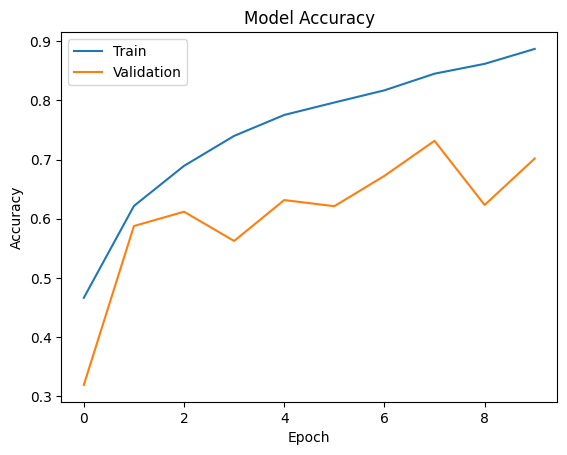

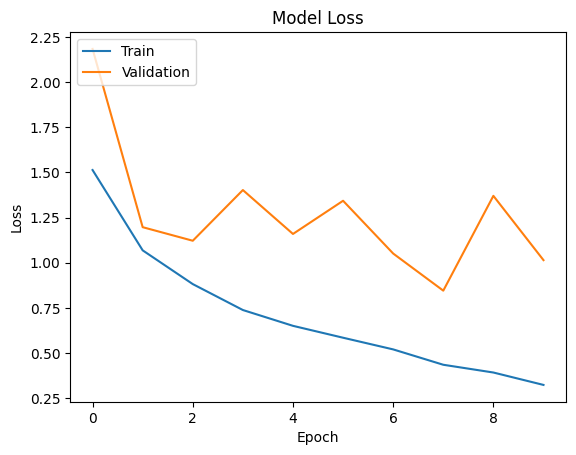

In [9]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
